In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
from pyspark.sql.types import IntegerType, FloatType
from pyspark.sql import SparkSession, DataFrame
import findspark
import pyspark.sql.functions as F
from pyspark.sql.functions import *

In [2]:
findspark.init()
findspark.find()

'C:\\Spark\\spark-3.0.3-bin-hadoop2.7'

In [3]:
spark = SparkSession \
.builder \
.appName("Practice") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()

In [4]:
df = spark.read.csv(".\data\practive pyspark.csv", header =True)
df.show(5)
df.printSchema()

+----+--------+------+---+---------+--------------+---------+-------+------------+-----------+------------+------+------------+-----------+-------------+--------------------+-----------------+-----------------+----------+------------------+-----------------+--------------------+-----------------+
|Code|    area|gender|age|age_group|year_of_school|   degree|    job|know_english|know_france|know_chinese|income|booking_date|flight_date|flight_status|professionally_staff|customer_service |diversity_product|good_price|easily_transaction|goodlooking_staff|diversity_flighttime|good_construction|
+----+--------+------+---+---------+--------------+---------+-------+------------+-----------+------------+------+------------+-----------+-------------+--------------------+-----------------+-----------------+----------+------------------+-----------------+--------------------+-----------------+
|   1| central|female| 69|   middle|            16|   master|manager|           1|          1|           1

# Clean Data

In [5]:
#Convering str to numberic
df = df.withColumn('Code', F.col('Code').cast(IntegerType()))\
        .withColumn('age', F.col('age').cast(FloatType()))\
        .withColumn('year_of_school',F.col('year_of_school').cast(IntegerType()))\
        .withColumn('know_english', F.col('know_english').cast(IntegerType()))\
        .withColumn('know_france', F.col('know_france').cast(IntegerType()))\
        .withColumn('know_chinese', F.col('know_chinese').cast(IntegerType()))\
        .withColumn('income', F.col('income').cast(FloatType()))\
        .withColumn('flight_status', F.col('flight_status').cast(IntegerType()))\
        .withColumn('professionally_staff', F.col('professionally_staff').cast(IntegerType()))\
        .withColumn('customer_service ', F.col('customer_service ').cast(IntegerType()))\
        .withColumn('diversity_product', F.col('diversity_product').cast(IntegerType()))\
        .withColumn('good_price', F.col('good_price').cast(IntegerType()))\
        .withColumn('easily_transaction', F.col('easily_transaction').cast(IntegerType()))\
        .withColumn('goodlooking_staff', F.col('goodlooking_staff').cast(IntegerType()))\
        .withColumn('diversity_flighttime', F.col('diversity_flighttime').cast(IntegerType()))\
        .withColumn('good_construction', F.col('good_construction').cast(IntegerType()))
df.printSchema()

root
 |-- Code: integer (nullable = true)
 |-- area: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: float (nullable = true)
 |-- age_group: string (nullable = true)
 |-- year_of_school: integer (nullable = true)
 |-- degree: string (nullable = true)
 |-- job: string (nullable = true)
 |-- know_english: integer (nullable = true)
 |-- know_france: integer (nullable = true)
 |-- know_chinese: integer (nullable = true)
 |-- income: float (nullable = true)
 |-- booking_date: string (nullable = true)
 |-- flight_date: string (nullable = true)
 |-- flight_status: integer (nullable = true)
 |-- professionally_staff: integer (nullable = true)
 |-- customer_service : integer (nullable = true)
 |-- diversity_product: integer (nullable = true)
 |-- good_price: integer (nullable = true)
 |-- easily_transaction: integer (nullable = true)
 |-- goodlooking_staff: integer (nullable = true)
 |-- diversity_flighttime: integer (nullable = true)
 |-- good_construction: integer (nu

In [6]:
ppandas = df.toPandas()
ppandas.head()

,Code,area,gender,age,age_group,year_of_school,degree,job,know_english,know_france,...,flight_date,flight_status,professionally_staff,customer_service,diversity_product,good_price,easily_transaction,goodlooking_staff,diversity_flighttime,good_construction
0,1,central,female,69.0,middle,16,master,manager,1,1,...,01/05/2013,1,2,2,1,1,2,2,1,1
1,2,southern,female,50.0,middle,12,highshool,officer,0,0,...,01/05/2013,1,3,3,3,2,3,3,2,3
2,3,northern,male,73.0,elder,12,highshool,officer,1,0,...,01/05/2013,1,2,2,1,2,3,5,1,1
3,4,northern,female,73.0,elder,12,highshool,officer,0,0,...,01/05/2013,1,5,3,2,4,5,3,2,2
4,5,central,male,69.0,middle,16,master,officer,1,0,...,01/05/2013,0,3,3,3,3,3,3,3,3


# Bài 1 thu nhập trung bình? mốt và trung vị về thu nhập

In [7]:
print("tthu nhập trung bình, mốt và trung vị về thu nhập là:")
df.describe(['income']).show()
med = df.approxQuantile("age", [0.5],0)
print("median is:", med)

tthu nhập trung bình, mốt và trung vị về thu nhập là:
+-------+----------------+
|summary|          income|
+-------+----------------+
|  count|             500|
|   mean|        13859.62|
| stddev|7144.29879569467|
|    min|          6300.0|
|    max|         54000.0|
+-------+----------------+

median is: [65.0]


In [8]:
#PySpark SQL Tutorial
df.createOrReplaceTempView("practice_pyspark")
df2 = spark.sql("SELECT * from practice_pyspark")

In [9]:
print("Mode là: ")
mode = spark.sql("SELECT income, count(income) as frequence FROM practice_pyspark GROUP by income order by frequence DESC LIMIT 1 ")
mode.show()

Mode là: 
+-------+---------+
| income|frequence|
+-------+---------+
|12300.0|       13|
+-------+---------+



<AxesSubplot:ylabel='income'>

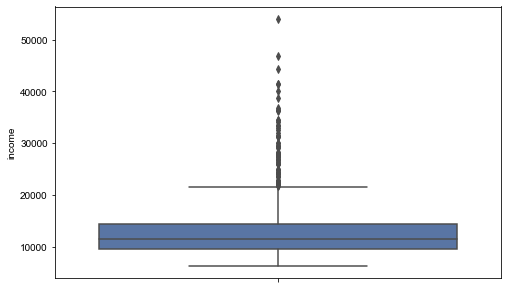

In [10]:
plt.subplots(figsize = (8,5))
sns.set_theme(style="whitegrid")
sns.boxplot(y=ppandas["income"])

# Bài 2. thu nhập trung bình từng khu vực

In [11]:
avgincome = df.groupby("area").avg("income")
avgincome.show()

+--------+------------------+
|    area|       avg(income)|
+--------+------------------+
| central| 19586.09661835749|
|southern| 8209.814814814816|
|northern|10750.421621621621|
+--------+------------------+



# Bài 3. số năm đi học tb đối với kh nam và là nv kinh doanh

In [12]:
avgyear = df.groupBy("gender","job").avg("year_of_school").where((col("gender")=='male')&(col("job")=="sale")).show()

+------+----+-------------------+
|gender| job|avg(year_of_school)|
+------+----+-------------------+
|  male|sale| 13.922413793103448|
+------+----+-------------------+



# bài 4. tuổi tb kh nữ sống ở miền nam và miền trung

In [13]:
avgage = df.groupBy("area").avg("age").where(col("area")!='southern')
avgage.show(truncate=False)        

+--------+------------------+
|area    |avg(age)          |
+--------+------------------+
|central |61.38647342995169 |
|northern|61.972972972972975|
+--------+------------------+



In [14]:
avgage = avgage.toPandas()

<AxesSubplot:xlabel='area', ylabel='avg(age)'>

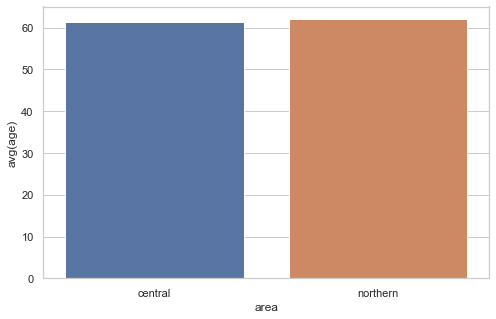

In [15]:
plt.subplots(figsize = (8,5))
sns.set_theme(style="whitegrid")
sns.barplot(x=avgage["area"], y = avgage['avg(age)'])

# Bài 5. tuổi tb cho 30% kh có tuổi thấp nhất

In [40]:
avgage30 = spark.sql("SELECT avg(age)  from practice_pyspark Where age in (SELECT age from practice_pyspark ORDER BY age ASC LIMIT 150 )")
avgage30.show()

+-----------------+
|         avg(age)|
+-----------------+
|43.85806451612903|
+-----------------+



In [53]:
#Cách 2
df.filter(col('age') < df.approxQuantile("age", [0.3], 0)[0]).agg(avg(col('age'))).show() 

+-----------------+
|         avg(age)|
+-----------------+
|43.33108108108108|
+-----------------+



# Bài 6. thu nhập tb cho 20% có tuổi thấp nhất

In [37]:
avgincome20 = spark.sql("SELECT avg(income)  from practice_pyspark Where age in (SELECT age from practice_pyspark ORDER BY age ASC LIMIT 100 )")
avgincome20.show()

+------------------+
|       avg(income)|
+------------------+
|10286.960784313726|
+------------------+



In [54]:
#cách 2
df.filter(col('age') < df.approxQuantile("age", [0.2], 0.05)[0]).agg(avg(col('income'))).show() 

+------------------+
|       avg(income)|
+------------------+
|10321.028037383177|
+------------------+



# Bài 7: số năm đi học tb cho 10% kh có thu nhập cao nhất

In [46]:
avgyear = spark.sql("SELECT avg(year_of_school)  from practice_pyspark Where income in (SELECT income from practice_pyspark ORDER BY income DESC LIMIT 50 )")
avgyear.show()

+-------------------+
|avg(year_of_school)|
+-------------------+
|              17.94|
+-------------------+



In [48]:
#cách 2
df.filter(col('income') > df.approxQuantile("income", [0.9], 0)[0]).agg(avg(col('year_of_school'))).show() 

+-------------------+
|avg(year_of_school)|
+-------------------+
|              17.94|
+-------------------+



# Bài 8 lập bảng thống kê số lượng khách hàng, tỷ trọng theo từng trình độ

In [162]:
df8 = df.groupBy('degree','code').count()
pivotDF  = df8.groupBy("count").pivot("degree").sum('count')
pivotDF.printSchema()
pivotDF.show(truncate=False)

root
 |-- count: long (nullable = false)
 |-- bachelor: long (nullable = true)
 |-- highshool: long (nullable = true)
 |-- master: long (nullable = true)

+-----+--------+---------+------+
|count|bachelor|highshool|master|
+-----+--------+---------+------+
|1    |129     |257      |114   |
+-----+--------+---------+------+



# Bài 9: lập bảng thống kê số lượng kh, tỷ trọng theo nhóm tuổi và giới tính

In [211]:
df3 = df.groupBy('age','gender','code').count()
pivotDF  = df3.groupBy("age").pivot("gender").sum('count')
pivotDF.printSchema()
pivotDF.show(truncate=False)

root
 |-- age: float (nullable = true)
 |-- female: long (nullable = true)
 |-- male: long (nullable = true)

+----+------+----+
|age |female|male|
+----+------+----+
|64.0|4     |12  |
|47.0|4     |3   |
|58.0|1     |6   |
|39.0|3     |2   |
|41.0|4     |2   |
|67.0|8     |39  |
|49.0|5     |2   |
|56.0|2     |4   |
|54.0|1     |4   |
|55.0|2     |5   |
|38.0|3     |2   |
|51.0|5     |5   |
|48.0|3     |2   |
|66.0|4     |22  |
|72.0|26    |5   |
|70.0|16    |6   |
|65.0|7     |23  |
|43.0|6     |3   |
|53.0|2     |2   |
|68.0|9     |25  |
+----+------+----+
only showing top 20 rows



In [212]:
pivotDF = pivotDF.toPandas()

<AxesSubplot:>

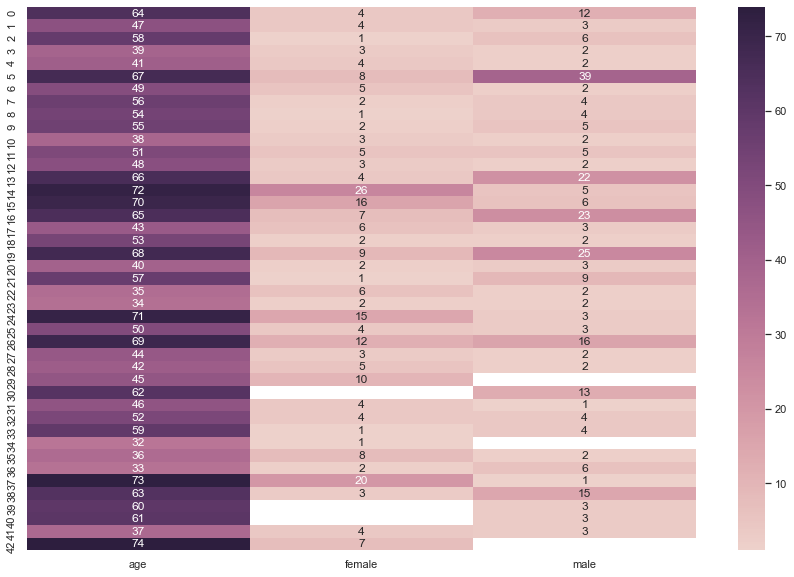

In [209]:
plt.figure(figsize=(15,10))
palette = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(pivotDF,cmap=palette, annot=True)

# Bài 10: Vẽ các loại biểu đồ theo các câu trên